<a href="https://colab.research.google.com/github/Abdelrahman-Elnagar/Basic_Data_Tasks/blob/main/Final_DS_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clara Amir Hakim Zaher          10002591
Abdelrahman Ali Hasan Elnagar   10006921

In [ ]:
!pip install pandas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("/content/CarPrice_Assignment.csv")

In [ ]:
#Let's clean the dataset

#to check whether or not there are duplicates in the data
duplicate_rows = df.duplicated()
print(sum(duplicate_rows))

#check if data contain any missing values
df.isnull().values.any()

from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
label_encoder = LabelEncoder()

# Apply label encoding to each column
for col in df_copy.columns:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

df_copy.to_csv('encoded_dataset.csv', index=False)

0


I have looped and examined all the k from 1 to 10 to find out that k=1 results in the best accuracy possible

Accuracy: 0.7804878048780488
Confusion Matrix:
[[7 1 0 0]
 [6 8 1 0]
 [0 0 8 1]
 [0 0 0 9]]
Recall: 0.7804878048780488
Precision: 0.8229518449030643
F1-score: 0.7770646127513907


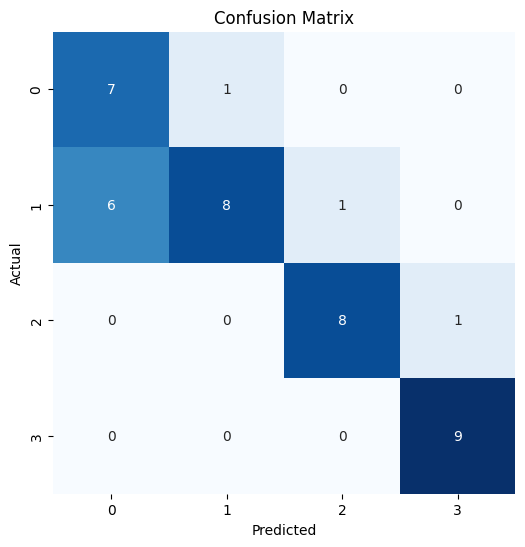

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Replace 'your_data.csv' with the path to your dataset
data = pd.read_csv('encoded_dataset.csv')

# Step 2: Preprocess the data
# Discretize the target variable 'price' into classes
bins = 4  # Adjust the number of bins as needed
discretizer = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='quantile')
data['price_class'] = discretizer.fit_transform(data[['price']])

# Step 3: Split the data into training and testing sets
X = data.drop(['price', 'price_class'], axis=1)  # Features
y = data['price_class']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the KNN classifier
k = 1  # Adjust the number of neighbors as needed
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Step 5: Evaluate the classifier
# Predictions
y_pred = knn_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#KNN Regressor

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
# Replace 'your_data.csv' with the path to your dataset
data = pd.read_csv('encoded_dataset.csv')

# Step 2: Split the data into features and target variable
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the KNN regressor
k = 3  # Adjust the number of neighbors as needed
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

# Step 5: Evaluate the regressor
# Predictions
y_pred = knn_regressor.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Squared Error: 361.0975609756098
R-squared Score: 0.8705512764136132


Accuracy: 0.6341463414634146
Confusion Matrix:
[[5 4 1 0]
 [5 7 1 0]
 [0 1 8 0]
 [0 0 3 6]]
Recall: 0.6341463414634146
Precision: 0.6615071919949969
F1-score: 0.6347671840354767


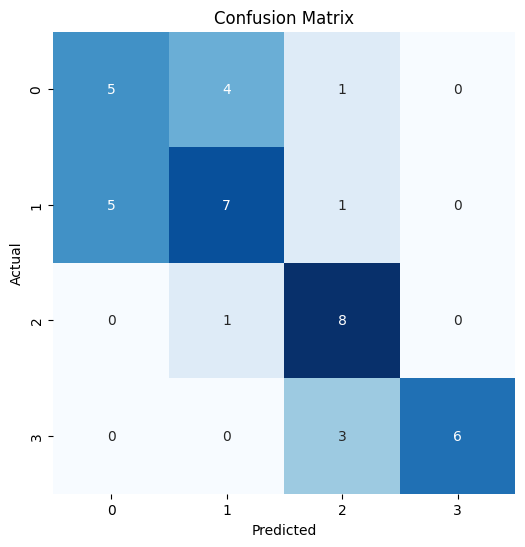

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Replace 'your_data.csv' with the path to your dataset
data = pd.read_csv('encoded_dataset.csv')

# Step 2: Convert the continuous target variable into discrete classes
# For example, you can bin the 'price' column into categories
bins = 4  # Adjust the number of bins as needed
data['price_class'] = pd.cut(data['price'], bins=bins, labels=False)

# Step 3: Split the data into features and target variable
X = data.drop(['price', 'price_class'], axis=1)  # Features
y = data['price_class']  # Target variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Step 6: Evaluate the classifier
# Predictions
y_pred = naive_bayes_classifier.predict(X_test)

# a) Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# b) Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# c) Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# d) Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.6585365853658537
Confusion Matrix:
[[6 4 0 0]
 [5 8 0 0]
 [0 1 7 1]
 [0 0 3 6]]
Recall: 0.6585365853658537
Precision: 0.6699714919227113
F1-score: 0.6608747478452227


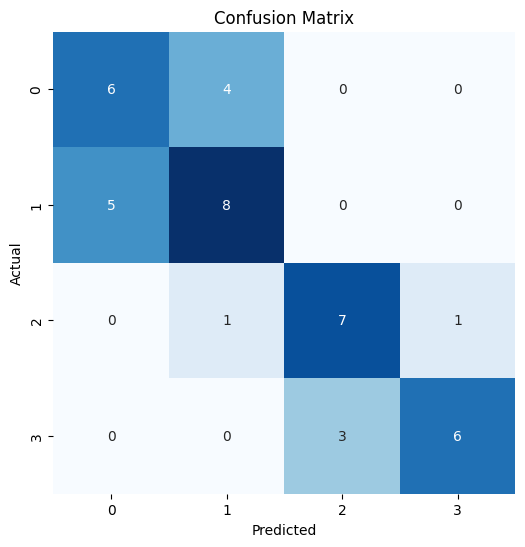

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Replace 'your_data.csv' with the path to your dataset
data = pd.read_csv('encoded_dataset.csv')

# Step 2: Convert the continuous target variable into discrete classes
# For example, you can bin the 'price' column into categories
bins = 4  # Adjust the number of bins as needed
data['price_class'] = pd.cut(data['price'], bins=bins, labels=False)

# Step 3: Split the data into features and target variable
X = data.drop(['price', 'price_class'], axis=1)  # Features
y = data['price_class']  # Target variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

# Step 6: Evaluate the classifier
# Predictions
y_pred = decision_tree_classifier.predict(X_test)

# a) Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# b) Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# c) Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# d) Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# so we got for KNN classifier with k=1 :
**Accuracy**: 0.7804878048780488,
**Recall**: 0.7804878048780488
**Precision**: 0.8229518449030643
**F1-score**: 0.7770646127513907

# and for Naive Bayes :
**Accuracy**: 0.6341463414634146 ,
**Recall**: 0.6341463414634146
**Precision**: 0.6615071919949969
**F1-score**: 0.6347671840354767

# and finally for Desicion Tree :
**Accuracy**: 0.6341463414634146 ,
**Recall**: 0.6341463414634146
**Precision**: 0.6487224157955865
**F1-score**: 0.6369786439491189

# Our conclusion :
The KNN classifier with k=1 performs the best across all metrics, having the highest accuracy, recall, precision, and F1-score.
Naive Bayes and Decision Tree models have similar performance metrics, with Naive Bayes having slightly higher precision and Decision Tree having a slightly higher F1-score.
Generally, the KNN classifier with k=1 seems to be the preferable choice among these three models for this particular problem based on the provided evaluation metrics.
meanwhile when we used KNN classifier with k=3 , we reached a conclusion
that Decision tree is better
